In [1]:
import wandb
import numpy as np
from MountainCarEnv import MountainCarEnv
from QLearning import QLearning

In [2]:
qLearningCar = QLearning("rgb_array")

In [3]:
all_alphas = []
all_epsilons = []
all_gammas = []

In [22]:
iterations = 100000
alpha = 0.8 #variacion permitida
all_alphas.append(alpha)

epsilon = 0.85 # -> más grande mas exploracion
all_epsilons.append(epsilon)

gamma = 0.75  #futuro - learning rate - mas bajo mas greedy
all_gammas.append(gamma)

In [65]:
all_epsilons

In [5]:
# start a new wandb run to track this script
wandb.init(
    # Dejar solo un proyecto
    project="MountainCar",
    
    # track hyperparameters and run metadata
    config={
        "iterations": iterations,#cambiar esto
        "initial_alpha": alpha,
        "initial_epsilon": epsilon,
        "initial_gamma": gamma,
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: irazoqui-santi (santiago-irazoqui). Use `wandb login --relogin` to force relogin


In [6]:
# qLearningCar.discretizar() #pasar variables de discretizacion desde ipynb

In [23]:
Q, initial_state_Q_list = qLearningCar.qLearning(iterations, alpha, epsilon, gamma)

In [ ]:
initial_state_Q_list

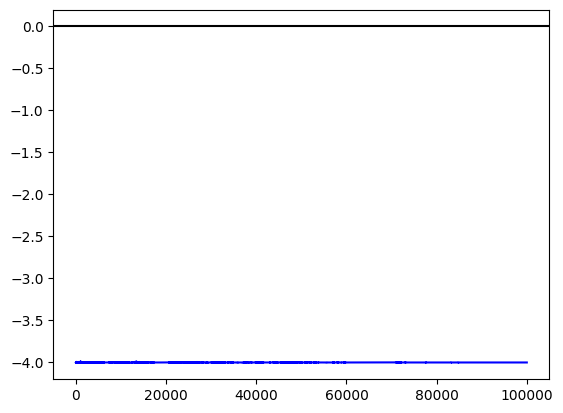

In [24]:
import matplotlib.pyplot as plt
plt.axhline(color='black')
my_plot = plt.plot(range(0, iterations), initial_state_Q_list, color='blue')

In [9]:
data = [[x, y] for (x, y) in zip(range(0, iterations), initial_state_Q_list)]
table = wandb.Table(data=data, columns = ["x", "y"])
wandb.log(
    {"Q_train_1" : wandb.plot.line(table, "x", "y",
           title="#1 Q train")})

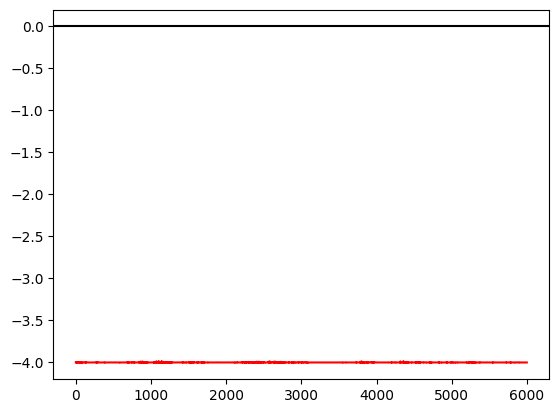

In [14]:
import matplotlib.pyplot as plt
plt.axhline(color='black')
plt.plot(range(0, iterations), initial_state_Q_list, color='blue')

In [9]:
obs = qLearningCar.env.reset()
state = qLearningCar.get_state(obs)
Q[state]

array([-35,  -5, -37])

In [19]:
Q[state][0]

NameError: name 'state' is not defined

In [25]:
qLearningCar.execute(20)

In [26]:
qLearningCar.rewards

[-500.0, -500.0, -500.0, -500.0]

In [27]:
#tendria que subir la plot
wandb.log({"rewards": qLearningCar.rewards})

In [ ]:
# log metrics to wandb --> these go on a separate table than the configuration in config.
#wandb.log({"acc": "test acc", "loss": "test loss"})

In [28]:
#finished uploading
wandb.finish()

In [14]:
#wandb.save('model.h5')

In [33]:
import pickle
pickle_out = open('Q_no_result.pkl', 'wb')
pickle.dump(Q, pickle_out)
pickle_out.close()